In [77]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import pandas as pd
import lightgbm as lgb

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [78]:
se = pd.read_csv(
    Path("./commonlit-evaluate-student-summaries/summaries_train.csv")
)

se.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [79]:
texts = se['text']

print(texts[:5])

0    The third wave was an experimentto see how peo...
1    They would rub it up with soda to make the sme...
2    In Egypt, there were many occupations and soci...
3    The highest class was Pharaohs these people we...
4    The Third Wave developed  rapidly because the ...
Name: text, dtype: object


In [80]:
def preprocess_text(text):
    # Replace newline characters with spaces
    text = text.replace('\n', ' ')
    
    # Replace sequences of whitespace characters with a single space
    text = ' '.join(text.split())
    
    return text

In [81]:
preprocessed_texts = [preprocess_text(text) for text in texts]

In [82]:
se['PreprocessedText'] = preprocessed_texts

In [83]:
test_texts = ["Farmers tended the fields, raised animals, kept canals and reservoirs in good order, worked in the stone quarries, and built the royal monuments. Farmers paid taxes that could amount to as much as 60% of their yearly harvest—that’s a lot of hay! Social mobility was not impossible. A small number of peasants and farmers moved up the economic ladder. Families saved money to send their sons to village schools to learn trades. These schools were run by priests or by artisans. Boys who learned to read and write could become scribes, then go on to gain employment in the government. It was possible for a boy born on a farm to work his way up into the higher ranks of the government. Bureaucracy proved lucrative."]

vectorizer = TfidfVectorizer(max_features=5000, stop_words=None)

X = vectorizer.fit_transform(test_texts)

In [84]:
print(se['text'].head())

0    The third wave was an experimentto see how peo...
1    They would rub it up with soda to make the sme...
2    In Egypt, there were many occupations and soci...
3    The highest class was Pharaohs these people we...
4    The Third Wave developed  rapidly because the ...
Name: text, dtype: object


In [85]:
#texts = [row[2] for row in se]

vectorizer = TfidfVectorizer(max_features=5000, stop_words=None)

X = vectorizer.fit_transform(se['PreprocessedText'])

In [86]:
correlation = se['content'].corr(se['wording'])
print('Correlation between content and wording: ', correlation)


Correlation between content and wording:  0.7513804859701986


In [87]:
y = se[['wording', 'content']].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Initialize the regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

In [90]:
rmse_wording = mean_squared_error(y_test[:, 0], y_pred[:, 0], squared=False)
rmse_content = mean_squared_error(y_test[:, 1], y_pred[:, 1], squared=False)

print(f"RMSE for wording: {rmse_wording}")
print(f"RMSE for content: {rmse_content}")

RMSE for wording: 0.7140610440104301
RMSE for content: 0.5889862654146798


In [92]:
print(type(X_train))

<class 'scipy.sparse.csr.csr_matrix'>


In [96]:
help(lgb.LGBMRegressor().fit)

Help on method fit in module lightgbm.sklearn:

fit(X: Union[lightgbm.compat.dt_DataTable, List[Union[List[float], List[int]]], numpy.ndarray, pandas.core.frame.DataFrame, scipy.sparse.base.spmatrix], y: Union[List[float], List[int], numpy.ndarray, pandas.core.series.Series, pandas.core.frame.DataFrame], sample_weight: Union[List[float], List[int], numpy.ndarray, pandas.core.series.Series, NoneType] = None, init_score: Union[List[float], List[List[float]], numpy.ndarray, pandas.core.series.Series, pandas.core.frame.DataFrame, NoneType] = None, eval_set: Union[List[Tuple[Union[lightgbm.compat.dt_DataTable, List[Union[List[float], List[int]]], numpy.ndarray, pandas.core.frame.DataFrame, scipy.sparse.base.spmatrix], Union[List[float], List[int], numpy.ndarray, pandas.core.series.Series, pandas.core.frame.DataFrame]]], NoneType] = None, eval_names: Union[List[str], NoneType] = None, eval_sample_weight: Union[List[Union[List[float], List[int], numpy.ndarray, pandas.core.series.Series]], Non

In [100]:
y=se['wording']


Fold 1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61803
[LightGBM] [Info] Number of data points in the train set: 4585, number of used features: 1159
[LightGBM] [Info] Start training from score -0.067838


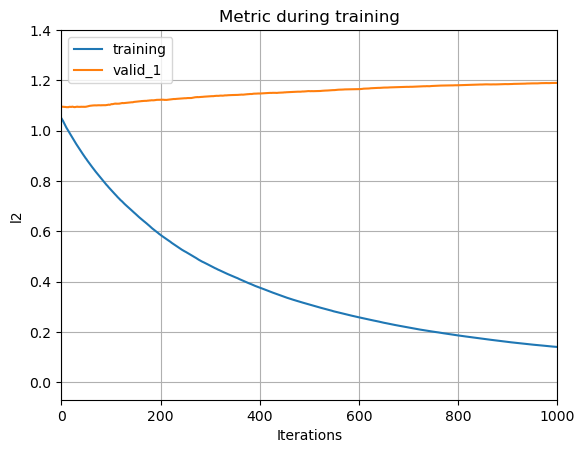


Fold 2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61480
[LightGBM] [Info] Number of data points in the train set: 4585, number of used features: 1149
[LightGBM] [Info] Start training from score -0.070241


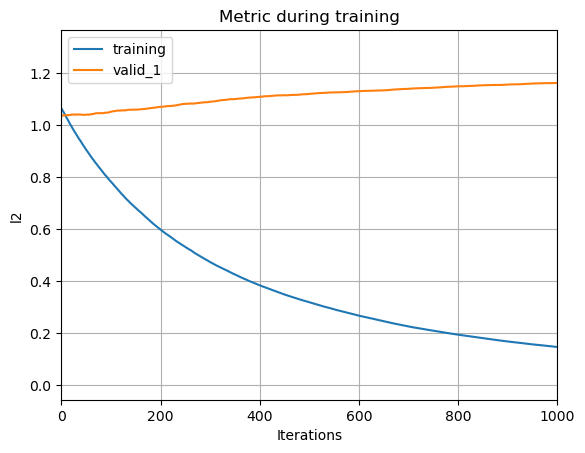


Fold 3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62217
[LightGBM] [Info] Number of data points in the train set: 4586, number of used features: 1162
[LightGBM] [Info] Start training from score -0.070628


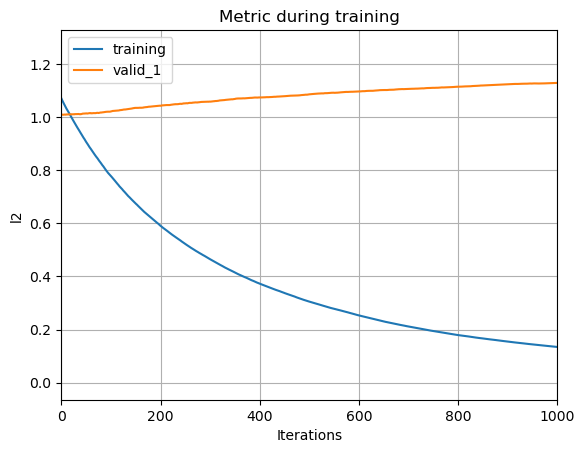


Fold 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62126
[LightGBM] [Info] Number of data points in the train set: 4586, number of used features: 1161
[LightGBM] [Info] Start training from score -0.069393


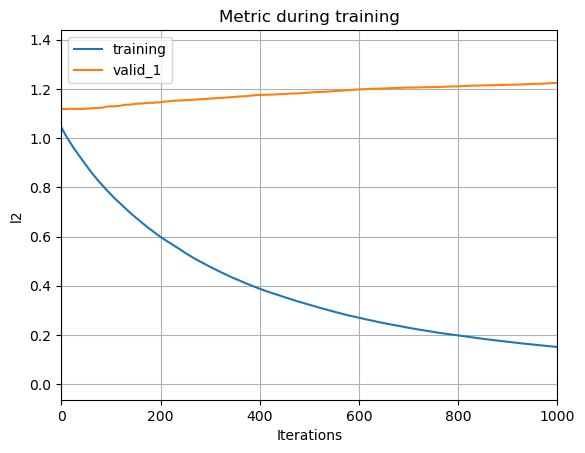


Fold 5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62074
[LightGBM] [Info] Number of data points in the train set: 4586, number of used features: 1159
[LightGBM] [Info] Start training from score -0.065577


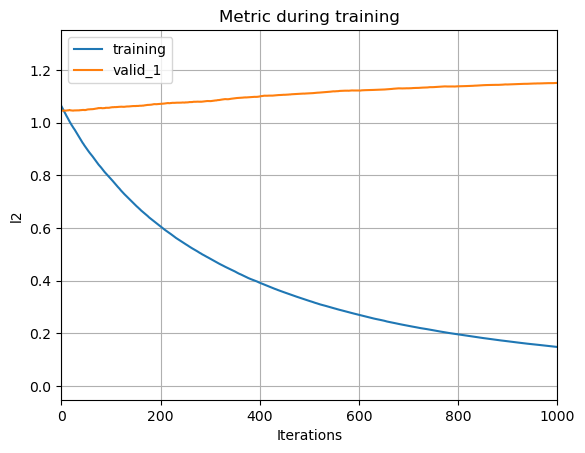

In [101]:
from sklearn.model_selection import KFold
import numpy as np

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=25)

val_preds = np.zeros(X_train.shape[0])
test_preds = np.zeros(X_test.shape[0]) 

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f'\nFold {fold + 1}')
    
    X_train_fold, X_val_fold = X_train.tocsr()[train_index].toarray(), X_train.tocsr()[val_index].toarray()
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Define and train the model. 
    model = lgb.LGBMRegressor(
        n_estimators=1000,
        num_leaves=50,
        learning_rate=0.03,
        colsample_bytree=0.1,
        min_child_samples=20,
        max_bins=500,
        reg_alpha=2,
        random_state=25
    )
    model.fit(
        X_train_fold, y_train_fold, 
        eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)], 
        eval_metric='rmse'
    )
    
    # plot loss during fit 
    lgb.plot_metric(model, metric='l2')
    plt.show()
    
    val_preds[val_index] = model.predict(X_val_fold)
    
    # Predict on the test set 
    test_preds += model.predict(X_test) / num_folds
